In [ ]:
#%pip install tensorflow==2.11.*

In [ ]:
#%pip install -q -U keras-tuner


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import regularizers
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

from datetime import datetime

2023-03-21 17:05:17.252181: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#assert library import
assert pd.__version__ >= '1.0.0'
assert np.__version__ >= '1.0.0'
assert tf.__version__ >= '2.0.0'
assert plt
assert Sequential
assert Dense
assert Dropout
assert BatchNormalization
assert Adam
assert l2
assert train_test_split
assert LabelEncoder
assert kt
assert tf.__version__ >= "2.0.0"

In [3]:
df = pd.read_csv('cleaned_data_final.csv')


In [4]:
#turn labels to 0 and 1s
df['radiant_win'] = df['radiant_win'].replace({True: 1, False: 0})
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,0,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,1,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,1,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,0,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,0,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,0,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,1,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,0,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,1,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 4:], df[['radiant_win']], test_size=0.2, random_state=42)

In [6]:
#convert numpy arrays of training to tensors, set to tf.float32
X_train_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

2023-03-21 17:05:26.335622: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
X_train_tensor.shape


TensorShape([73270, 246])

In [8]:
#hyperparameter tuning dictionary that will be searched on
params = {
    'learning_rate': [0.001, 0.01],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'regularization_strength': [0.01, 0.1]
}

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import regularizers
import warnings
warnings.filterwarnings("ignore", message="The `lr` argument is deprecated, use `learning_rate` instead.")
# Function to create SVM model
def create_svm_model(regularization_strength=0.01, learning_rate=0.01, activation= 'relu'):
    model = Sequential()
    model.add(Dense(1, input_shape=(246,), activation=activation, kernel_regularizer=regularizers.l2(regularization_strength)))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = create_svm_model, verbose=0)


/var/folders/zr/l3b0jnnd4rs2n6yf0p7__f500000gn/T/ipykernel_4047/3609994879.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_svm_model, verbose=0)


In [11]:
search= RandomizedSearchCV(estimator= model, param_distributions= params, cv=3, verbose=3)
search_result= search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END activation=tanh, learning_rate=0.001, regularization_strength=0.01;, score=0.500 total time=   2.5s
[CV 2/3] END activation=tanh, learning_rate=0.001, regularization_strength=0.01;, score=0.503 total time=   2.2s
[CV 3/3] END activation=tanh, learning_rate=0.001, regularization_strength=0.01;, score=0.502 total time=   2.2s
[CV 1/3] END activation=sigmoid, learning_rate=0.01, regularization_strength=0.01;, score=0.521 total time=   2.4s
[CV 2/3] END activation=sigmoid, learning_rate=0.01, regularization_strength=0.01;, score=0.514 total time=   2.2s
[CV 3/3] END activation=sigmoid, learning_rate=0.01, regularization_strength=0.01;, score=0.515 total time=   2.2s
[CV 1/3] END activation=sigmoid, learning_rate=0.01, regularization_strength=0.1;, score=0.542 total time=   2.2s
[CV 2/3] END activation=sigmoid, learning_rate=0.01, regularization_strength=0.1;, score=0.544 total time=   2.1s
[CV 3/3] END activation=sig

In [13]:
print(search_result.best_params_)


{'regularization_strength': 0.1, 'learning_rate': 0.01, 'activation': 'tanh'}


In [17]:
best_params = search_result.best_params_

model = create_svm_model(learning_rate=best_params['learning_rate'], 
                     activation=best_params['activation'], 
                     regularization_strength=best_params['regularization_strength'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.8011 - accuracy: 0.5323 - val_loss: 0.6908 - val_accuracy: 0.5486
Epoch 2/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6910 - accuracy: 0.5456 - val_loss: 0.6915 - val_accuracy: 0.5409
Epoch 3/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6909 - accuracy: 0.5456 - val_loss: 0.6915 - val_accuracy: 0.5472
Epoch 4/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6908 - accuracy: 0.5479 - val_loss: 0.6921 - val_accuracy: 0.5370
Epoch 5/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6909 - accuracy: 0.5474 - val_loss: 0.6909 - val_accuracy: 0.5488
Epoch 6/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6910 - accuracy: 0.5471 - val_loss: 0.6918 - val_accuracy: 0.5388
Epoch 7/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6911 - accuracy: 0.5465 - val_loss: 0.6913 - val_ac

In [18]:
#evaluate test accuracy
test_loss, test_acc = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

573/573 [==============================] - 1s 908us/step - loss: 0.6908 - accuracy: 0.5472
Test Loss: 0.6908
Test Accuracy: 0.5472


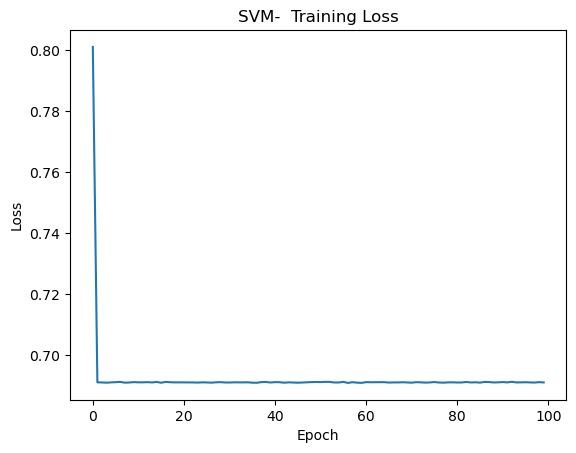

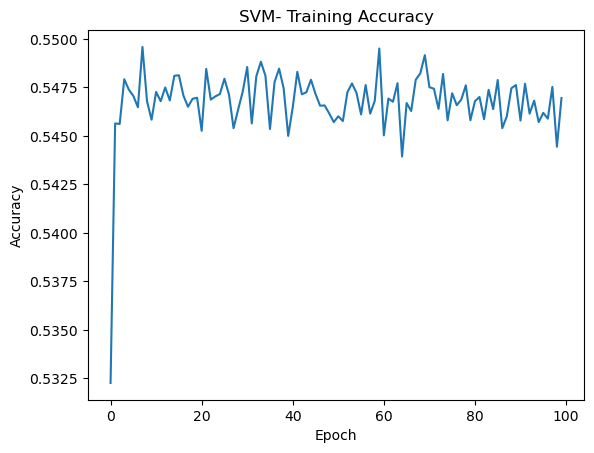

In [19]:
#training loss plot
plt.plot(history.history['loss'])
plt.title('SVM-  Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#training accuracy plot
plt.plot(history.history['accuracy'])
plt.title('SVM- Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
import seaborn as sns

def show_metrics(y_tr, y_te, yhat_tr, yhat_te, named):
    # accuracy scores for training and test sets
    acc_train = accuracy_score(y_tr, yhat_tr)
    acc_test = accuracy_score(y_te, yhat_te)

    print(f'training set accuracy (n={y_tr.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_te.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_te, yhat_te))
    print()

    with sns.axes_style('white'):
        # confusion matrix
        ConfusionMatrixDisplay.from_predictions(y_te, yhat_te)
        plt.show()
        
        # roc-auc
        fpr, tpr, thresholds = roc_curve(y_te, yhat_te) 
        roc_auc = auc(fpr, tpr)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=named)
        roc_display.plot()
        plt.title('ROC Curve')
        plt.show()
        
        #precision recall curve
        PrecisionRecallDisplay.from_predictions(y_te, yhat_te, name=named)
        plt.show()

In [29]:
# Make predictions on test set
yhat_te_prob = model.predict(X_test)
yhat_te = (yhat_te_prob > 0.5).astype(int)
yhat_te

yhat_tr_prob = model.predict(X_train)
yhat_tr = (yhat_tr_prob > 0.5).astype(int)
yhat_tr

2290/2290 [==============================] - 2s 673us/step


array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [30]:
yhat_tr.shape


(73270, 1)

training set accuracy (n=73270): 0.549
test set accuracy (n=18318): 0.547

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.57      0.36      0.44      9062
           1       0.54      0.73      0.62      9256

    accuracy                           0.55     18318
   macro avg       0.55      0.55      0.53     18318
weighted avg       0.55      0.55      0.53     18318




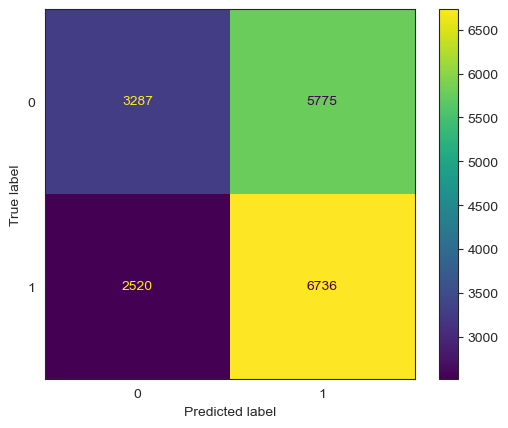

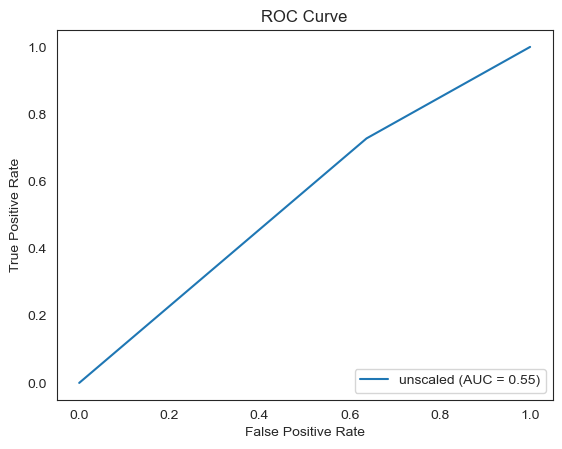

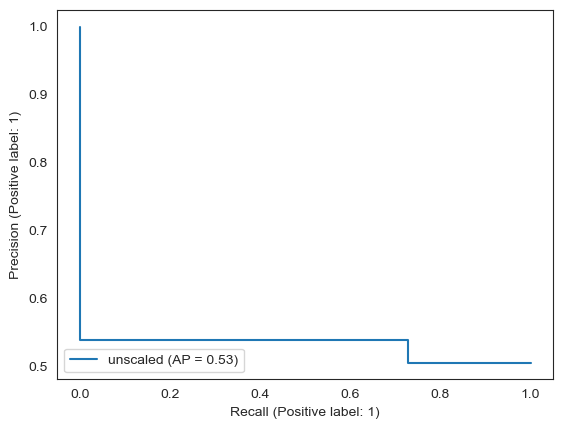

In [39]:
show_metrics(y_train, y_test, yhat_tr, yhat_te, 'unscaled')
